# 라이브러리 import

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

mlp.rcParams['font.family'] = 'Malgun Gothic'
mlp.rcParams['axes.unicode_minus'] = False

# 1. 데이터 확인

In [ ]:
data = pd.read_csv('boarding_final_data.csv')
data

,요금,승차거리,대기시간,공휴일,평균기온(°C),일강수량(mm),안개 계속시간(hr),차고지,접수시간,출발지구_출발지동,목적지구_목적지동
0,1500,2967.0,32.950000,1,-4.2,0.0,0.00,0,4,노원구_중계4동,노원구_하계1동
1,1500,3808.0,123.600000,1,-4.2,0.0,0.00,0,2,서대문구_홍제제1동,서대문구_충현동
2,1700,5390.0,122.900000,1,-4.2,0.0,0.00,1,3,노원구_월계2동,성북구_안암동
3,1500,1106.0,30.366667,1,-4.2,0.0,0.00,1,6,노원구_하계1동,노원구_하계1동
4,1500,4702.0,147.833333,1,-4.2,0.0,0.00,0,4,서대문구_남가좌제2동,마포구_망원제1동
...,...,...,...,...,...,...,...,...,...,...,...
804684,2000,6885.0,62.583333,0,2.1,4.7,1.18,1,20,강서구_방화제2동,양천구_신월2동
804685,1500,1064.0,69.716667,0,2.1,4.7,1.18,0,20,은평구_불광제1동,은평구_대조동
804686,1500,1610.0,47.983333,0,2.1,4.7,1.18,0,21,은평구_대조동,은평구_응암제1동
804687,1500,1745.0,72.166667,0,2.1,4.7,1.18,1,22,노원구_하계1동,노원구_중계1동


# 2. 데이터 전처리

## 2-1 대기시간 10분 단위로 분류

In [ ]:
# 구간 정의
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, np.inf]
labels = [
    '0분-10분', '10분-20분', '20분-30분', '30분-40분', '40분-50분',
    '50분-60분', '60분-70분', '70분-80분', '80분-90분', '90분-100분',
    '100분-110분', '110분-120분', '120분 이상'
]

# 10분 간격으로 범주화
data['대기시간_범주'] = pd.cut(
    data['대기시간'],
    bins=bins,
    right=False,  # 오른쪽 경계를 포함하지 않음(미만)
    labels=labels
)
data.head()

,요금,승차거리,대기시간,공휴일,평균기온(°C),일강수량(mm),안개 계속시간(hr),차고지,접수시간,출발지구_출발지동,목적지구_목적지동,대기시간_범주
0,1500,2967.0,32.950000,1,-4.2,0.0,0.0,0,4,노원구_중계4동,노원구_하계1동,30분-40분
1,1500,3808.0,123.600000,1,-4.2,0.0,0.0,0,2,서대문구_홍제제1동,서대문구_충현동,120분 이상
2,1700,5390.0,122.900000,1,-4.2,0.0,0.0,1,3,노원구_월계2동,성북구_안암동,120분 이상
3,1500,1106.0,30.366667,1,-4.2,0.0,0.0,1,6,노원구_하계1동,노원구_하계1동,30분-40분
4,1500,4702.0,147.833333,1,-4.2,0.0,0.0,0,4,서대문구_남가좌제2동,마포구_망원제1동,120분 이상


## 2-2 대기시간 범주별 빈도 시각화

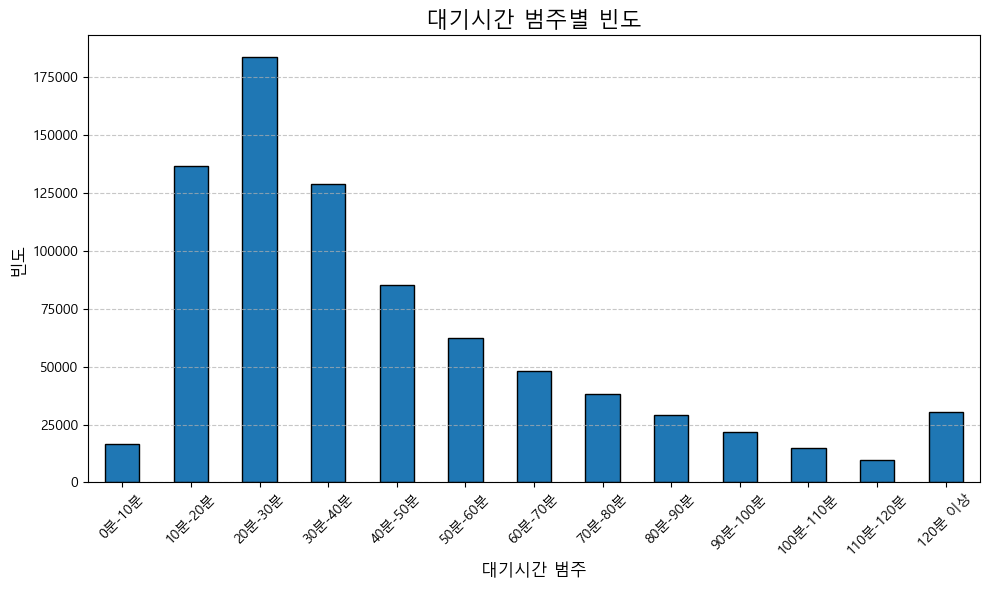

In [ ]:
# 범주의 빈도 계산
frequency = data['대기시간_범주'].value_counts(sort=False)

# 빈도 시각화
plt.figure(figsize=(10, 6))
frequency.plot(kind='bar', edgecolor='black')
plt.title('대기시간 범주별 빈도', fontsize=16)
plt.xlabel('대기시간 범주', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2-3 범주형 변수 원핫인코딩

In [ ]:
# 원핫인코딩 데이터에서 불리언 타입만 변환
onehot_data = pd.get_dummies(data, columns=['출발지구_출발지동', '목적지구_목적지동'])
boolean_columns = onehot_data.select_dtypes(include=['bool']).columns

# 불리언 열만 정수로 변환
onehot_data[boolean_columns] = onehot_data[boolean_columns].astype(int)
onehot_data

,요금,승차거리,대기시간,공휴일,평균기온(°C),일강수량(mm),안개 계속시간(hr),차고지,접수시간,대기시간_범주,...,목적지구_목적지동_중랑구_면목제5동,목적지구_목적지동_중랑구_면목제7동,목적지구_목적지동_중랑구_묵제1동,목적지구_목적지동_중랑구_묵제2동,목적지구_목적지동_중랑구_상봉제1동,목적지구_목적지동_중랑구_상봉제2동,목적지구_목적지동_중랑구_신내1동,목적지구_목적지동_중랑구_신내2동,목적지구_목적지동_중랑구_중화제1동,목적지구_목적지동_중랑구_중화제2동
0,1500,2967.0,32.950000,1,-4.2,0.0,0.00,0,4,30분-40분,...,0,0,0,0,0,0,0,0,0,0
1,1500,3808.0,123.600000,1,-4.2,0.0,0.00,0,2,120분 이상,...,0,0,0,0,0,0,0,0,0,0
2,1700,5390.0,122.900000,1,-4.2,0.0,0.00,1,3,120분 이상,...,0,0,0,0,0,0,0,0,0,0
3,1500,1106.0,30.366667,1,-4.2,0.0,0.00,1,6,30분-40분,...,0,0,0,0,0,0,0,0,0,0
4,1500,4702.0,147.833333,1,-4.2,0.0,0.00,0,4,120분 이상,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804684,2000,6885.0,62.583333,0,2.1,4.7,1.18,1,20,60분-70분,...,0,0,0,0,0,0,0,0,0,0
804685,1500,1064.0,69.716667,0,2.1,4.7,1.18,0,20,60분-70분,...,0,0,0,0,0,0,0,0,0,0
804686,1500,1610.0,47.983333,0,2.1,4.7,1.18,0,21,40분-50분,...,0,0,0,0,0,0,0,0,0,0
804687,1500,1745.0,72.166667,0,2.1,4.7,1.18,1,22,70분-80분,...,0,0,0,0,0,0,0,0,0,0


## 2-4 입력 변수(X)와 타겟 변수(y) 분리

In [ ]:
# X와 y 분리
X = onehot_data.drop('대기시간_범주', axis=1)
y = onehot_data['대기시간_범주']

## 2-5 훈련셋, 검증셋, 테스트셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련셋(80)과 테스트셋(20) 분리 (stratify : 클래스 비율 일정하게)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 훈련셋에서 검증셋 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)  # 20% * 0.25 = 5% 검증셋

## 2-6 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일러 초기화 및 훈련 데이터로 학습
scaler = StandardScaler()
scaler.fit(X_train)

# 훈련 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 검증 데이터 변환
X_val_scaled = scaler.transform(X_val)
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)

**성능 보고서 해석**
- `Precision`: 각 클래스에 대해 예측이 얼마나 정확한지
- `Recall`: 각 클래스에 대해 놓친 데이터를 얼마나 잘 찾아냈는지
- `F1-Score`: Precision과 Recall의 조화 평균
- `support` : 각 클래스별로 실제 타깃 데이터에 포함된 샘플의 개수
- `macro avg`: 모든 클래스의 단순 평균 (클래스 비율 무시)
- `weighted avg`: 각 클래스의 지원 데이터 개수를 가중치로 고려한 평균

# 3. 로지스틱 회귀 모델

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 다중 클래스 로지스틱 회귀 모델 생성
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# 모델 학습
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [ ]:
# 검증 데이터 예측
y_val_pred = lr_model.predict(X_val_scaled)

# 검증 데이터 정확도 확인
# 정확도는 클래스 불균형이 있는 경우 잘못된 결과를 줄 수 있음 => Precision, Recall, F1 Score등 다른 평가지표를 확인
print("검증 데이터 정확도:", accuracy_score(y_val, y_val_pred))
print("검증 데이터 성능 보고서:\n", classification_report(y_val, y_val_pred))
print("검증 데이터 Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred)) # 왼쪽(실제값), 위쪽(예측값)

검증 데이터 정확도: 0.9802408380867166
검증 데이터 성능 보고서:
               precision    recall  f1-score   support

      0분-10분       1.00      0.86      0.92      3313
   100분-110분       0.92      0.90      0.91      2965
     10분-20분       0.98      0.99      0.99     27334
   110분-120분       0.94      0.87      0.90      1908
     120분 이상       0.99      0.99      0.99      6070
     20분-30분       0.99      0.99      0.99     36723
     30분-40분       0.99      0.99      0.99     25707
     40분-50분       0.99      0.99      0.99     17053
     50분-60분       0.98      0.98      0.98     12444
     60분-70분       0.98      0.97      0.97      9581
     70분-80분       0.96      0.98      0.97      7655
     80분-90분       0.96      0.96      0.96      5826
    90분-100분       0.93      0.94      0.94      4359

    accuracy                           0.98    160938
   macro avg       0.97      0.96      0.96    160938
weighted avg       0.98      0.98      0.98    160938

검증 데이터 Confusion Matrix:
 [[ 284

- 모든 평가지표가 좋게 나옴 -> 스케일링 전 데이터로도 진행(스케일링의 영향이 큰지 확인)

In [ ]:
# 다중 클래스 로지스틱 회귀 모델 생성(스케일 전 데이터로!)
lr_model_no_scale = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# 모델 학습
lr_model_no_scale.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [ ]:
# 검증 데이터 예측
y_val_pred = lr_model_no_scale.predict(X_val)

# 검증 데이터 정확도 확인
# 정확도는 클래스 불균형이 있는 경우 잘못된 결과를 줄 수 있음 => Precision, Recall, F1 Score등 다른 평가지표를 확인
print("검증 데이터 정확도:", accuracy_score(y_val, y_val_pred))
print("검증 데이터 성능 보고서:\n", classification_report(y_val, y_val_pred))
print("검증 데이터 Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred)) # 왼쪽(실제값), 위쪽(예측값)

검증 데이터 정확도: 0.37647417017733537
검증 데이터 성능 보고서:
               precision    recall  f1-score   support

      0분-10분       0.00      0.00      0.00      3313
   100분-110분       0.00      0.00      0.00      2965
     10분-20분       0.59      0.27      0.37     27334
   110분-120분       0.04      0.04      0.04      1908
     120분 이상       0.52      0.91      0.67      6070
     20분-30분       0.44      0.90      0.59     36723
     30분-40분       0.32      0.24      0.27     25707
     40분-50분       0.24      0.39      0.30     17053
     50분-60분       0.00      0.00      0.00     12444
     60분-70분       0.14      0.13      0.13      9581
     70분-80분       0.00      0.00      0.00      7655
     80분-90분       0.00      0.00      0.00      5826
    90분-100분       0.34      0.09      0.15      4359

    accuracy                           0.38    160938
   macro avg       0.20      0.23      0.19    160938
weighted avg       0.31      0.38      0.31    160938

검증 데이터 Confusion Matrix:
 [[   

# 4. SVM 모델

- 너무 오래걸림

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.svm import SVC

# # PCA 적용 (차원 축소)
# pca = PCA(n_components=10)
# X_train_reduced = pca.fit_transform(X_train_scaled)
# X_val_reduced = pca.transform(X_val_scaled)

In [ ]:
# SVM 모델 생성 및 학습
# svm_model = SVC(kernel='rbf', C=1, gamma=0.1, random_state=42)
# svm_model.fit(X_train_reduced, y_train)

In [ ]:
# 검증 데이터 예측
# y_val_pred = svm_model.predict(X_val_reduced)

# # 검증 데이터 정확도 확인
# print("검증 데이터 정확도:", accuracy_score(y_val, y_val_pred))
# print("검증 데이터 성능 보고서:\n", classification_report(y_val, y_val_pred))
# print("검증 데이터 Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# 5. 랜덤포레스트 모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 속도 개선을 위한 랜덤포레스트 설정
rf_model = RandomForestClassifier(
    n_estimators=50,       # 트리 개수 축소
    max_depth=10,          # 트리 깊이 제한
    n_jobs=-1,             # 병렬 처리 활성화
    random_state=42
)

# 모델 학습
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [ ]:
# 검증 데이터 예측
y_val_pred = rf_model.predict(X_val)

# 검증 데이터 정확도 확인
# 정확도는 클래스 불균형이 있는 경우 잘못된 결과를 줄 수 있음 => Precision, Recall, F1 Score등 다른 평가지표를 확인
print("검증 데이터 정확도:", accuracy_score(y_val, y_val_pred))
print("검증 데이터 성능 보고서:\n", classification_report(y_val, y_val_pred))
print("검증 데이터 Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred)) # 왼쪽(실제값), 위쪽(예측값)

검증 데이터 정확도: 0.5438056891473735
검증 데이터 성능 보고서:
               precision    recall  f1-score   support

      0분-10분       0.00      0.00      0.00      3313
   100분-110분       0.00      0.00      0.00      2965
     10분-20분       0.90      0.84      0.87     27334
   110분-120분       0.84      0.04      0.08      1908
     120분 이상       0.97      0.15      0.26      6070
     20분-30분       0.58      1.00      0.73     36723
     30분-40분       0.38      1.00      0.55     25707
     40분-50분       0.32      0.07      0.11     17053
     50분-60분       0.56      0.01      0.02     12444
     60분-70분       0.20      0.00      0.00      9581
     70분-80분       0.50      0.00      0.00      7655
     80분-90분       1.00      0.00      0.00      5826
    90분-100분       0.00      0.00      0.00      4359

    accuracy                           0.54    160938
   macro avg       0.48      0.24      0.20    160938
weighted avg       0.54      0.54      0.43    160938

검증 데이터 Confusion Matrix:
 [[    

# 6. XGBoost 모델

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder로 타깃 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [ ]:
import xgboost as xgb

# XGBoost 모델 초기화
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # 다중분류를 위한 softmax 설정
    num_class=len(set(y_train)),  # 클래스 개수 설정
    eval_metric='mlogloss',  # 다중분류에서 사용되는 손실 함수
    use_label_encoder=False,  # 최신 버전에서 필요하지 않음
    random_state=42  # 재현성을 위한 랜덤 시드
)

# 모델 학습
xgb_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=13, num_parallel_tree=None, ...)

In [ ]:
# 검증 데이터 예측
y_val_pred = xgb_model.predict(X_val)

# 검증 데이터 정확도 확인
# 정확도는 클래스 불균형이 있는 경우 잘못된 결과를 줄 수 있음 => Precision, Recall, F1 Score등 다른 평가지표를 확인
print("검증 데이터 정확도:", accuracy_score(y_val_encoded, y_val_pred))
print("검증 데이터 성능 보고서:\n", classification_report(y_val_encoded, y_val_pred))
print("검증 데이터 Confusion Matrix:\n", confusion_matrix(y_val_encoded, y_val_pred)) # 왼쪽(실제값), 위쪽(예측값)

검증 데이터 정확도: 0.9860256744833414
검증 데이터 성능 보고서:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      3313
           1       0.96      0.87      0.91      2965
           2       0.99      1.00      0.99     27334
           3       0.87      0.88      0.87      1908
           4       0.97      0.99      0.98      6070
           5       1.00      0.99      1.00     36723
           6       1.00      1.00      1.00     25707
           7       0.99      0.99      0.99     17053
           8       0.99      0.99      0.99     12444
           9       0.99      0.98      0.99      9581
          10       0.97      0.97      0.97      7655
          11       0.93      0.98      0.96      5826
          12       0.95      0.94      0.94      4359

    accuracy                           0.99    160938
   macro avg       0.97      0.96      0.97    160938
weighted avg       0.99      0.99      0.99    160938

검증 데이터 Confusion Matrix:
 [[ 315

# 7. lightGBM 모델

In [ ]:
from lightgbm import LGBMClassifier

# LightGBM 모델 초기화
lgbm_model = LGBMClassifier(
    objective='multiclass',       # 다중 분류를 위한 설정
    num_class=len(set(y_train)),  # 클래스 개수
    boosting_type='gbdt',         # 부스팅 방식
    learning_rate=0.1,            # 학습률
    max_depth=7,                  # 트리의 최대 깊이
    n_estimators=500,             # 트리 개수
    subsample=0.8,                # 데이터 샘플링 비율
    colsample_bytree=0.8,         # 트리 생성에 사용할 피처 비율
    random_state=42               # 재현성을 위한 랜덤 시드
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.8, max_depth=7, n_estimators=500,
               num_class=13, objective='multiclass', random_state=42,
               subsample=0.8)

In [ ]:
# 검증 데이터 예측
y_val_pred = lgbm_model.predict(X_val)

# 검증 데이터 정확도 확인
# 정확도는 클래스 불균형이 있는 경우 잘못된 결과를 줄 수 있음 => Precision, Recall, F1 Score등 다른 평가지표를 확인
print("검증 데이터 정확도:", accuracy_score(y_val, y_val_pred))
print("검증 데이터 성능 보고서:\n", classification_report(y_val, y_val_pred))
print("검증 데이터 Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred)) # 왼쪽(실제값), 위쪽(예측값)

검증 데이터 정확도: 0.9840373311461557
검증 데이터 성능 보고서:
               precision    recall  f1-score   support

      0분-10분       0.99      0.97      0.98      3313
   100분-110분       0.90      0.90      0.90      2965
     10분-20분       0.99      1.00      0.99     27334
   110분-120분       0.88      0.90      0.89      1908
     120분 이상       0.99      0.98      0.99      6070
     20분-30분       1.00      0.99      0.99     36723
     30분-40분       0.99      0.99      0.99     25707
     40분-50분       0.98      0.99      0.99     17053
     50분-60분       0.98      0.98      0.98     12444
     60분-70분       0.99      0.97      0.98      9581
     70분-80분       0.97      0.99      0.98      7655
     80분-90분       0.97      0.97      0.97      5826
    90분-100분       0.93      0.93      0.93      4359

    accuracy                           0.98    160938
   macro avg       0.97      0.97      0.97    160938
weighted avg       0.98      0.98      0.98    160938

검증 데이터 Confusion Matrix:
 [[ 322

# 8. CatBoost 모델

In [ ]:
from catboost import CatBoostClassifier

# CatBoost 모델 초기화
catboost_model = CatBoostClassifier(
    iterations=500,               # 반복 수 (트리 개수)
    learning_rate=0.1,            # 학습률
    depth=7,                      # 트리의 최대 깊이
    loss_function='MultiClass',   # 다중 분류를 위한 손실 함수
    eval_metric='Accuracy',       # 평가 지표
    random_seed=42,               # 재현성을 위한 랜덤 시드
    verbose=100                   # 학습 과정을 출력 (100회마다)
)

# 모델 학습
catboost_model.fit(X_train, y_train,)

0:	learn: 0.8724682	total: 375ms	remaining: 3m 7s
100:	learn: 0.9850501	total: 20.9s	remaining: 1m 22s
200:	learn: 0.9854105	total: 41.4s	remaining: 1m 1s
300:	learn: 0.9858144	total: 1m 1s	remaining: 40.8s
400:	learn: 0.9861686	total: 1m 21s	remaining: 20.2s
499:	learn: 0.9865227	total: 1m 41s	remaining: 0us


In [ ]:
# 검증 데이터 예측
y_val_pred = catboost_model.predict(X_val)

# 검증 데이터 정확도 확인
# 정확도는 클래스 불균형이 있는 경우 잘못된 결과를 줄 수 있음 => Precision, Recall, F1 Score등 다른 평가지표를 확인
print("검증 데이터 정확도:", accuracy_score(y_val, y_val_pred))
print("검증 데이터 성능 보고서:\n", classification_report(y_val, y_val_pred))
print("검증 데이터 Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred)) # 왼쪽(실제값), 위쪽(예측값)

검증 데이터 정확도: 0.984198884042302
검증 데이터 성능 보고서:
               precision    recall  f1-score   support

      0분-10분       1.00      0.94      0.97      3313
   100분-110분       0.91      0.93      0.92      2965
     10분-20분       0.99      1.00      0.99     27334
   110분-120분       0.92      0.92      0.92      1908
     120분 이상       0.98      1.00      0.99      6070
     20분-30분       1.00      0.99      1.00     36723
     30분-40분       0.99      0.99      0.99     25707
     40분-50분       0.99      0.98      0.98     17053
     50분-60분       0.98      0.99      0.99     12444
     60분-70분       1.00      0.98      0.99      9581
     70분-80분       0.96      0.97      0.96      7655
     80분-90분       0.92      0.97      0.94      5826
    90분-100분       0.95      0.89      0.92      4359

    accuracy                           0.98    160938
   macro avg       0.97      0.97      0.97    160938
weighted avg       0.98      0.98      0.98    160938

검증 데이터 Confusion Matrix:
 [[ 3117